### 카메라 파라미터 로드 + 원본이미지 로드

In [116]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

raw_img_1 = cv2.imread('images/straight_lines1.jpg', cv2.IMREAD_COLOR)
raw_img_2 = cv2.imread('images/straight_lines2.jpg', cv2.IMREAD_COLOR)

calibration_data = pickle.load(open('calibration_data.p','rb'))

matrix = calibration_data['camera_matrix']
dist_coef = calibration_data['distortion_coefficient']

source_points = [(580, 460), (205, 720), (1110, 720), (703, 460)]
dest_points = [(320, 0), (320, 720), (960, 720), (960, 0)]

warp_matrix = cv2.getPerspectiveTransform(np.float32(source_points), np.float32(dest_points))
inv_warp_matrix = cv2.getPerspectiveTransform(np.float32(dest_points), np.float32(source_points))

In [126]:
def show_dotted_image(this_image, points, color=[255,0,255], thickness=5, d=15):
    image = this_image.copy()
    image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    cv2.line(image, points[0],points[1],color,thickness)
    cv2.line(image, points[2],points[3],color,thickness)
    
    circle_color = (30,120,180)
    for point in points:
        cv2.circle(image, point, d,circle_color,-1)

    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    ax.imshow(image)
        
    plt.show()

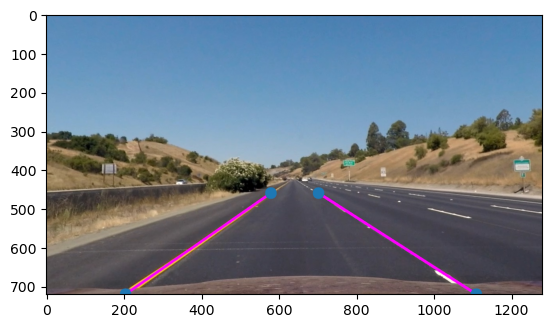

In [127]:
img_dst_1 = cv2.undistort(raw_img_1, matrix, dist_coef, None, matrix)
show_dotted_image(img_dst_1,source_points)

In [128]:
def birdeye_sky_view(ground_image):
    temp_image = cv2.undistort(ground_image, matrix, dist_coef, None, matrix)
    shape = (temp_image.shape[1] ,temp_image.shape[0]) # (width,height)
    # 위쪽에 이미 구해놓았음
    # warp_matrix = cv2.getPerspectiveTransform(np.float32(source_points), np.float32(dest_points))
    warp_image = cv2.warpPerspective(temp_image, warp_matrix, shape, flags=cv2.INTER_LINEAR)
    
    return warp_image

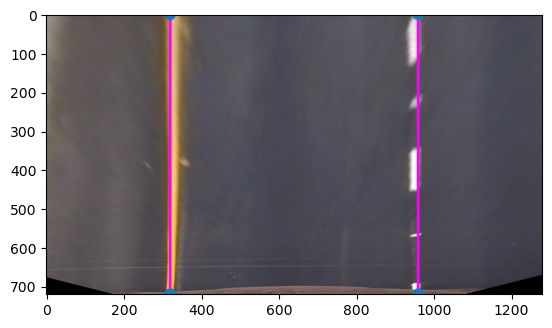

In [129]:
img_warp_1 = birdeye_sky_view(raw_img_1)
show_dotted_image(img_warp_1,dest_points)

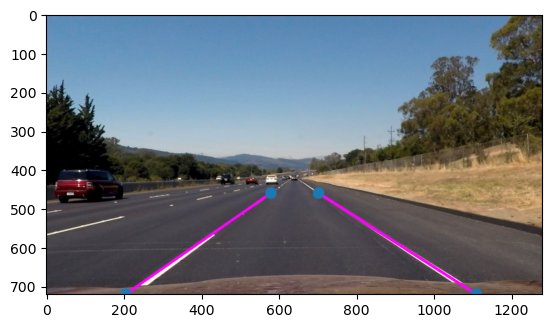

In [130]:
img_dst_2 = cv2.undistort(raw_img_2, matrix, dist_coef, None, matrix)
show_dotted_image(img_dst_2,source_points)

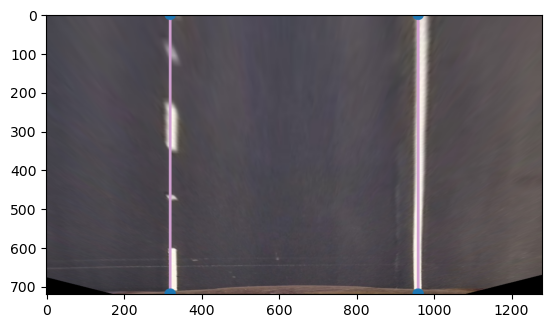

In [138]:
img_warp_2 = birdeye_sky_view(raw_img_2)
show_dotted_image(img_warp_2,dest_points,(210,160,210))

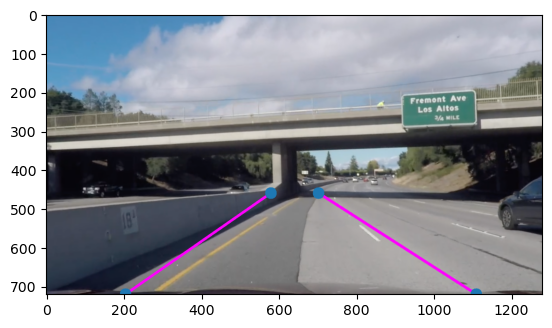

In [132]:
raw_img_3 = cv2.imread('images/curve_lines1.jpg',cv2.IMREAD_COLOR)
img_dst_3 = cv2.undistort(raw_img_3, matrix, dist_coef, None, matrix)
show_dotted_image(img_dst_3,source_points)

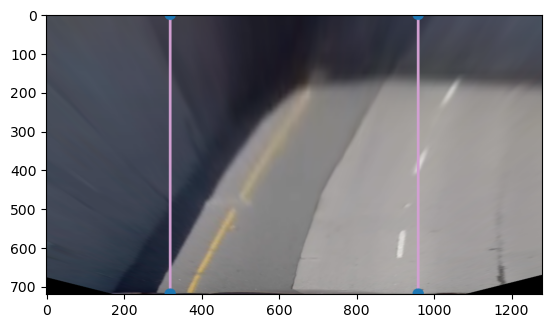

In [139]:
img_warp_3 = birdeye_sky_view(raw_img_3)
show_dotted_image(img_warp_3,dest_points,(210,160,210))

### 결과값을 한꺼번에 보기

In [141]:
def get_dotted_image(this_image, points, color=[255,0,255], thickness=5, d=15):
    image = this_image.copy()

    cv2.line(image, points[0],points[1],color,thickness)
    cv2.line(image, points[2],points[3],color,thickness)
    
    circle_color = (180,120,30)
    for point in points:
        cv2.circle(image, point, d,circle_color,-1)
    return image

In [147]:
import glob

images = glob.glob('P2_Perspective_transform/images/*.jpg')
tot_images = len(images)

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    img_dst = cv2.undistort(img, matrix, dist_coef, None, matrix)
    img_1 = get_dotted_image(img_dst,source_points)
    img_2 = birdeye_sky_view(img_dst)
    img_2 = get_dotted_image(img_2,dest_points,(210,160,210))
    img_dst = cv2.hconcat([img_1,img_2])
    img_dst = cv2.pyrDown(img_dst)
    cv2.putText(img_dst, f'{idx+1:02d}/{tot_images}', (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2, cv2.LINE_AA)
    cv2.imshow('img', img_dst)
    cv2.waitKey(800)
cv2.destroyAllWindows()